install the required libraries

In [1]:
!pip install pandas seaborn matplotlib prophet streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 143.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


Create a dataset simulating team tasks with timestamps. For simplicity, assume tasks are logged with start and end times, team member IDs, and task descriptions.

In [2]:
import pandas as pd
import numpy as np

# Generate dummy dataset
np.random.seed(42)
data = {
    "team_member": np.random.choice(["Alice", "Bob", "Charlie", "Diana"], 200),
    "task_description": np.random.choice(
        ["Coding", "Design Review", "Testing", "Documentation", "Meeting"], 200
    ),
    "start_time": pd.date_range("2023-11-01", periods=200, freq="30min"),
    "task_duration": np.random.randint(1, 5, 200)  # Duration in hours
}

df = pd.DataFrame(data)
df["end_time"] = df["start_time"] + pd.to_timedelta(df["task_duration"], unit="H")
df["hour"] = df["start_time"].dt.hour
df.head()


<ipython-input-2-e4cd95cd1167>:16: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  df["end_time"] = df["start_time"] + pd.to_timedelta(df["task_duration"], unit="H")


,team_member,task_description,start_time,task_duration,end_time,hour
0,Charlie,Coding,2023-11-01 00:00:00,4,2023-11-01 04:00:00,0
1,Diana,Documentation,2023-11-01 00:30:00,1,2023-11-01 01:30:00,0
2,Alice,Meeting,2023-11-01 01:00:00,1,2023-11-01 02:00:00,1
3,Charlie,Documentation,2023-11-01 01:30:00,3,2023-11-01 04:30:00,1
4,Charlie,Meeting,2023-11-01 02:00:00,2,2023-11-01 04:00:00,2


The application allows users to upload their datasets (e.g., CSV files) and analyzes the data for productivity tracking.

In [4]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Streamlit App
st.title("AI-Based Team Productivity Tracker")

# 1. Upload Dataset
st.header("Upload Your Dataset")
uploaded_file = st.file_uploader("Upload a CSV file", type=["csv"])

if uploaded_file:
    # Load the dataset
    df = pd.read_csv(uploaded_file)

    # Display dataset preview
    st.subheader("Uploaded Dataset Preview")
    st.write(df.head())

    # Ensure the dataset has necessary columns
    required_columns = ["team_member", "task_description", "start_time", "task_duration"]
    if all(col in df.columns for col in required_columns):
        # Parse datetime columns
        df["start_time"] = pd.to_datetime(df["start_time"])
        df["end_time"] = df["start_time"] + pd.to_timedelta(df["task_duration"], unit="H")
        df["hour"] = df["start_time"].dt.hour

        # 2. Analyze Productivity Trends
        st.header("Productivity Trends")
        hourly_productivity = df.groupby("hour").size().reset_index(name="task_count")

        # Visualization: Hourly Productivity
        st.subheader("Hourly Productivity Trends")
        fig, ax = plt.subplots()
        ax.bar(hourly_productivity["hour"], hourly_productivity["task_count"], color="skyblue")
        ax.set_title("Hourly Productivity Trends")
        ax.set_xlabel("Hour of Day")
        ax.set_ylabel("Number of Tasks")
        st.pyplot(fig)

        # 3. Forecasting with Prophet
        st.header("Task Forecasting")
        forecast_data = df[["start_time"]].copy()
        forecast_data["y"] = 1
        forecast_data = forecast_data.groupby("start_time").sum().reset_index()
        forecast_data.rename(columns={"start_time": "ds"}, inplace=True)

        # Train Prophet model
        model = Prophet()
        model.fit(forecast_data)

        # Make predictions
        future = model.make_future_dataframe(periods=48, freq="H")
        forecast = model.predict(future)

        # Visualization: Forecast
        st.subheader("Productivity Forecast")
        forecast_fig = model.plot(forecast)
        st.pyplot(forecast_fig)

        # 4. Task Distribution Analysis
        st.header("Task Distribution")
        task_counts = df["task_description"].value_counts()
        st.bar_chart(task_counts)

        # 5. Team Member Performance
        st.header("Team Member Productivity")
        team_productivity = df.groupby("team_member").size().reset_index(name="task_count")
        st.write(team_productivity)
        st.bar_chart(team_productivity.set_index("team_member"))
    else:
        st.error(f"The dataset must include the following columns: {required_columns}")
else:
    st.info("Awaiting file upload... Please upload a CSV file to proceed.")



2024-11-29 14:44:56.233 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:44:56.404 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-29 14:44:56.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:44:56.419 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:44:56.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:44:56.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:44:56.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:44:56.439 Thread 'MainThread': mi

Trend Analysis
Insights:
Peak Productivity Hours: Analyze the time periods with the highest number of completed tasks.
Task Distribution: Assess the frequency of task types.
Performance Patterns: Track individual contributions

<ipython-input-5-8f6c599497e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="task_count", data=hourly_productivity, palette="viridis")


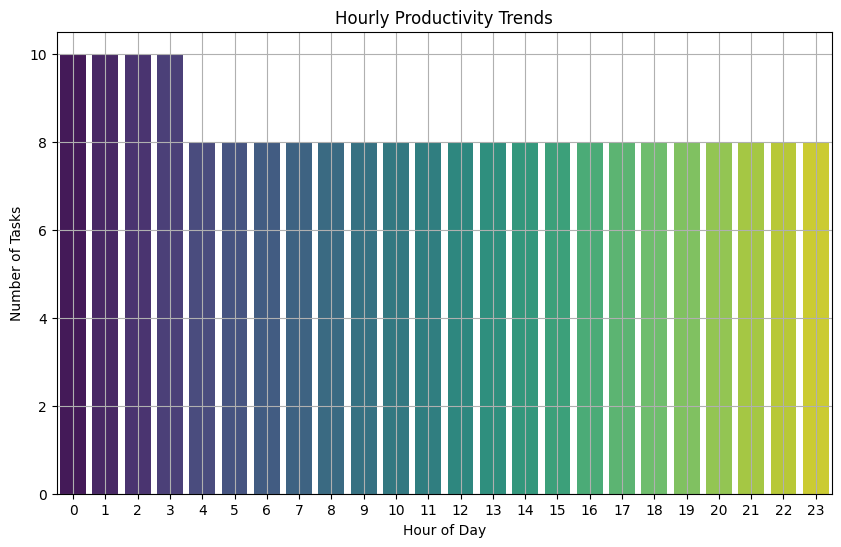

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

hourly_productivity = df.groupby("hour").size().reset_index(name="task_count")

plt.figure(figsize=(10, 6))
sns.barplot(x="hour", y="task_count", data=hourly_productivity, palette="viridis")
plt.title("Hourly Productivity Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tasks")
plt.grid()
plt.show()


Forecasting
Time-Series Analysis:
Prophet is ideal for forecasting task trends, scalable for large datasets and future-proof for time-series extensions.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


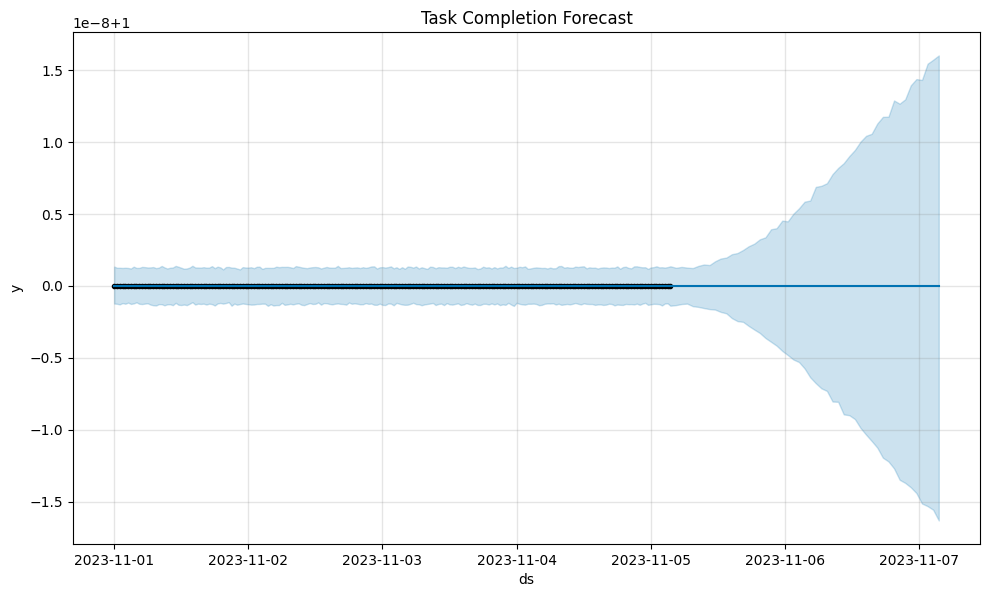

In [6]:
from prophet import Prophet

# Prepare data
forecast_data = df[["start_time"]].copy()
forecast_data["y"] = 1  # Treat each task as one unit
forecast_data = forecast_data.groupby("start_time").sum().reset_index()
forecast_data.rename(columns={"start_time": "ds"}, inplace=True)

# Train Prophet model
model = Prophet()
model.fit(forecast_data)

# Make predictions
future = model.make_future_dataframe(periods=48, freq="H")
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Task Completion Forecast")
plt.show()


Visualization and Insights
Interactive Dashboards:
Create a dashboard for managers using Streamlit to make insights accessible.

In [7]:
import streamlit as st

st.title("Team Productivity Dashboard")
st.bar_chart(hourly_productivity.set_index("hour"))
st.line_chart(forecast[["ds", "yhat"]].set_index("ds"))


2024-11-29 14:47:19.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:47:19.545 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:47:19.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:47:19.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:47:19.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-29 14:47:19.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Run with straemlit

In [9]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


Code Modularity
Design functions for reusability:

In [3]:
def analyze_productivity(df):
    return df.groupby("hour").size().reset_index(name="task_count")

def forecast_trends(df):
    forecast_data = df[["start_time"]].copy()
    forecast_data["y"] = 1
    forecast_data = forecast_data.groupby("start_time").sum().reset_index()
    forecast_data.rename(columns={"start_time": "ds"}, inplace=True)

    model = Prophet()
    model.fit(forecast_data)
    future = model.make_future_dataframe(periods=48, freq="H")
    return model.predict(future)


Install Gradio: First, install Gradio by running

In [1]:
!pip install gradio


Modify the Code for Gradio Interface: We'll use Gradio to create an interactive interface where users can upload their CSV file or input API credentials (e.g., Jira credentials) for real-time analysis. Below is the updated code for the app.

In [2]:
import gradio as gr
import pandas as pd
import requests
from prophet import Prophet
import matplotlib.pyplot as plt

# Function to upload and process the CSV or fetch data from API
def process_data(uploaded_file=None, jira_username=None, jira_token=None, api_url=None):
    # If user uploads a CSV file
    if uploaded_file:
        df = pd.read_csv(uploaded_file.name)
    # If user wants to fetch data from Jira API
    elif jira_username and jira_token and api_url:
        headers = {
            'Authorization': f'Basic {requests.auth._basic_auth_str(jira_username, jira_token)}'
        }
        query_params = {
            "jql": "project = YOUR_PROJECT_KEY AND assignee IS NOT EMPTY",
            "maxResults": 100,
            "fields": "summary,assignee,created,updated,status"
        }
        response = requests.get(api_url, headers=headers, params=query_params)
        if response.status_code == 200:
            jira_data = response.json()
            tasks = [
                {
                    "assignee": issue["fields"]["assignee"]["displayName"] if issue["fields"]["assignee"] else "Unassigned",
                    "task_description": issue["fields"]["summary"],
                    "created": issue["fields"]["created"],
                    "updated": issue["fields"]["updated"],
                    "status": issue["fields"]["status"]["name"]
                }
                for issue in jira_data["issues"]
            ]
            df = pd.DataFrame(tasks)
        else:
            return f"Failed to fetch data: {response.status_code} - {response.text}"
    else:
        return "Please upload a CSV file or provide Jira API credentials."

    # Process Data for analysis
    df["start_time"] = pd.to_datetime(df["created"])
    df["task_duration"] = 1  # Assume each task took 1 hour for simplicity
    df["end_time"] = df["start_time"] + pd.to_timedelta(df["task_duration"], unit="H")
    df["hour"] = df["start_time"].dt.hour

    # 1. Hourly Productivity Trend
    hourly_productivity = df.groupby("hour").size().reset_index(name="task_count")

    # Create Hourly Productivity Chart
    fig, ax = plt.subplots()
    ax.bar(hourly_productivity["hour"], hourly_productivity["task_count"], color="skyblue")
    ax.set_title("Hourly Productivity Trends")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Number of Tasks")
    plt.tight_layout()
    hourly_productivity_chart = plt.savefig("/tmp/hourly_productivity.png")

    # 2. Forecasting with Prophet
    forecast_data = df[["start_time"]].copy()
    forecast_data["y"] = 1
    forecast_data = forecast_data.groupby("start_time").sum().reset_index()
    forecast_data.rename(columns={"start_time": "ds"}, inplace=True)

    # Train Prophet model
    model = Prophet()
    model.fit(forecast_data)
    future = model.make_future_dataframe(periods=48, freq="H")
    forecast = model.predict(future)

    # Plot Forecast
    fig_forecast = model.plot(forecast)
    forecast_chart = "/tmp/forecast_chart.png"
    plt.savefig(forecast_chart)

    return hourly_productivity_chart, forecast_chart, df.head()

# Gradio interface
def create_gradio_interface():
    with gr.Blocks() as demo:
        gr.Markdown("### AI-Based Team Productivity Tracker")

        with gr.Tab("Upload Data"):
            uploaded_file = gr.File(label="Upload your CSV file")
            gr.Markdown("Or provide Jira API credentials below")
            jira_username = gr.Textbox(label="Jira Username", placeholder="Enter your Jira username")
            jira_token = gr.Textbox(label="Jira API Token", placeholder="Enter your Jira API token", type="password")
            api_url = gr.Textbox(label="Jira API URL", placeholder="Enter Jira API URL (e.g., https://your-domain.atlassian.net/rest/api/3/search)")

            output_images = gr.Image(label="Hourly Productivity Trends")
            output_forecast = gr.Image(label="Productivity Forecast")
            df_preview = gr.DataFrame()

            # Process data and display results
            gr.Button("Analyze Data").click(process_data, inputs=[uploaded_file, jira_username, jira_token, api_url],
                                            outputs=[output_images, output_forecast, df_preview])

    return demo

# Launch Gradio app
demo = create_gradio_interface()
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ece714db959b57b390.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
